In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fields2 = pd.read_csv("ekoniva-dataset/fields_new.csv")
value2 = pd.read_csv("ekoniva-dataset/value_new.csv")
works2 = pd.read_csv("ekoniva-dataset/works_new.csv")

In [7]:
table = works2.merge(value2[["work_id", "inv_item_weight", "inv_item_dose"]], on="work_id")
works3 = works2[works2["season"] == 2023]
fields3 = fields2[fields2["season"] == 2023]
table = works3.merge(fields3[["field", "fertility_score", "season", "crop_yearold", "area", "yield_plan", "p2o5", "k2o", "humus", "ph"]], on="field")
table2 = table.copy()
table2.pop("field")
table2.pop("work_type")
table2.pop("work_subtype")
table2.pop("start_date")
table2.pop("end_date")
table2.pop("main_tech")
table2.pop("add_tech")
table2.pop("mech")
table2.pop("work_id")
table2.pop("prod_purpose")
table2.pop("season_y")
table2.pop("season_x")
table2.pop("prod_weight")
table2.pop("prod_dry_perc")
table2.pop("Unnamed: 13")
table2.pop("Unnamed: 14")
table2 = table2.rename(columns={
    'area_x': 'completed_work_area',
    'area_y': 'field_area'
})

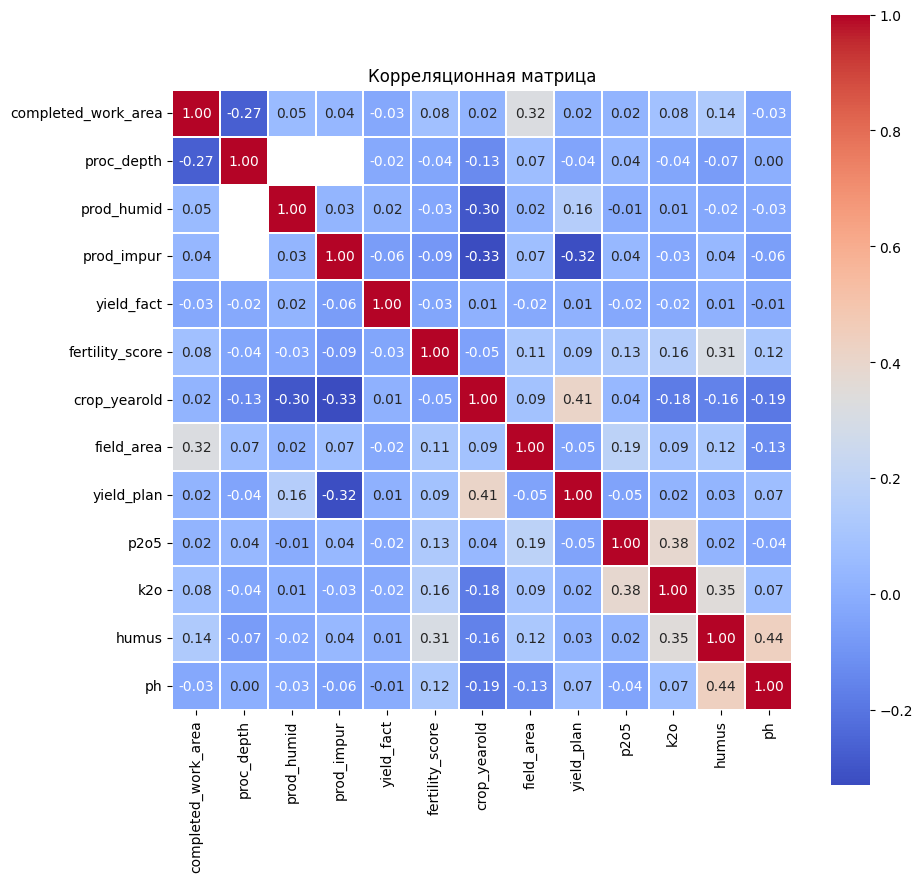

In [9]:
#works3.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(table2.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidth=0.1)
plt.title('Корреляционная матрица')
plt.savefig("corr.svg" )
plt.show()

